##### Yu Han June, 2023
This script is evolved from 0.replicability. I seperated protein vs. non protein channel features. 2. biological retrieval is plotted, scatters are color coded with 1. techinical retrieval. Specifics are detailed here: https://github.com/broadinstitute/2021_09_01_VarCHAMP/issues/5#issuecomment-1591387742

In [1]:
import pandas as pd
import numpy as np
from copairs.map import aggregate
from copairs.map import run_pipeline
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#read profile
df_p1=pd.read_csv('../../varchamp_profiles/2023_02_23_Batch_3/2022_10_11_PPL9_P1/2022_10_11_PPL9_P1_normalized_feature_select_batch.csv.gz')
df_p2=pd.read_csv('../../varchamp_profiles/2023_02_23_Batch_3/2022_09_29_PPL9_P2/2022_09_29_PPL9_P2_normalized_feature_select_batch.csv.gz')
df_p3=pd.read_csv('../../varchamp_profiles/2023_02_23_Batch_3/2022_09_29_PPL9_P3/2022_09_29_PPL9_P3_normalized_feature_select_batch.csv.gz')
#read metadata
df_metadata=pd.read_csv('../../varchamp_profiles/2023_02_23_Batch_3.csv')
df_metadata.head(2)

,Metadata_Well,384_ID,entryID,Symbol,entry_plate.x,entry_well.x,entry_numb,dest_plate_96,dest_well_96,dest_numb_96,...,r384,c384,Metadata_Plate,batch,control,Gene,MT,Variant,Metadata_Sample_Unique,Metadata_batch_Plate
0,A01,1_1,DisWTGDEh03_F06,ACSF3,DisWTGDEh03,F06,46.0,FVrry_P01_Q01,A01,1.0,...,1.0,1.0,2022_10_11_PPL9_P1,2023_02_23_Batch_3,False,ACSF3,NaN,ACSF3,ACSF3,2023_02_23_Batch_3-2022_10_11_PPL9_P1
1,C01,3_1,VUSmut_GDEh03_A02,ACSF3,VUSmut_GDEh03,A02,9.0,FVrry_P01_Q01,B01,2.0,...,3.0,1.0,2022_10_11_PPL9_P1,2023_02_23_Batch_3,False,ACSF3,Ala197Thr,ACSF3 Ala197Thr,ACSF3 Ala197Thr,2023_02_23_Batch_3-2022_10_11_PPL9_P1


In [3]:
#concatenate df_p1, df_p2, df_p3
df=pd.concat([df_p1,df_p2,df_p3],axis=0)
#remove Metadata_Symbol=516-TC in df
df_profile=df[df['Metadata_Symbol']!='516 - TC']
df_profile.head(2)

,Metadata_384_ID,Metadata_entryID,Metadata_Symbol,Metadata_entry_plate.x,Metadata_entry_well.x,Metadata_entry_numb,Metadata_dest_plate_96,Metadata_dest_well_96,Metadata_dest_numb_96,Metadata_orf_id,...,Nuclei_Texture_SumEntropy_DNA_20_01_256,Nuclei_Texture_SumEntropy_DNA_20_02_256,Nuclei_Texture_SumEntropy_DNA_20_03_256,Nuclei_Texture_SumVariance_AGP_20_02_256,Nuclei_Texture_SumVariance_DNA_20_01_256,Nuclei_Texture_SumVariance_DNA_20_02_256,Nuclei_Texture_SumVariance_DNA_20_03_256,Nuclei_Texture_SumVariance_GFP_5_01_256,Nuclei_Texture_SumVariance_Mito_20_03_256,Nuclei_Texture_Variance_AGP_10_00_256
0,1_1,DisWTGDEh03_F06,ACSF3,DisWTGDEh03,F06,46.0,FVrry_P01_Q01,A01,1.0,71337.0,...,-1.6834,-1.84680,-1.56960,-0.43763,-1.05170,-1.06410,-0.99208,-0.59723,0.94397,-0.54754
1,3_1,VUSmut_GDEh03_A02,ACSF3,VUSmut_GDEh03,A02,9.0,FVrry_P01_Q01,B01,2.0,71337.0,...,0.1716,0.42315,0.38591,-0.64088,0.37808,0.38868,1.27990,-0.65973,4.86160,-0.73677


In [4]:
#merge Gene, MT, and Metadata_Sample_Unique from df_metadata to df_profile 
#based on columns of Metadata_Well and Metadata_Plate
df_merge=df_profile.merge(df_metadata[['Metadata_Well','Metadata_Plate','Gene','MT','Metadata_Sample_Unique']],on=['Metadata_Well','Metadata_Plate'],how='left')
#change Gene to Metadata_Gene and MT to Metadata_MT
df_merge.rename(columns={'Gene':'Metadata_Gene','MT':'Metadata_MT'},inplace=True)
#add a column of Metadata_type where if Metadata_MT is NaN, Metadata_type is 'WT', otherwise 'MT'
df_merge['Metadata_type']=np.where(df_merge['Metadata_MT'].isnull(),'WT','MT')
df_merge.head(2)

,Metadata_384_ID,Metadata_entryID,Metadata_Symbol,Metadata_entry_plate.x,Metadata_entry_well.x,Metadata_entry_numb,Metadata_dest_plate_96,Metadata_dest_well_96,Metadata_dest_numb_96,Metadata_orf_id,...,Nuclei_Texture_SumVariance_DNA_20_01_256,Nuclei_Texture_SumVariance_DNA_20_02_256,Nuclei_Texture_SumVariance_DNA_20_03_256,Nuclei_Texture_SumVariance_GFP_5_01_256,Nuclei_Texture_SumVariance_Mito_20_03_256,Nuclei_Texture_Variance_AGP_10_00_256,Metadata_Gene,Metadata_MT,Metadata_Sample_Unique,Metadata_type
0,1_1,DisWTGDEh03_F06,ACSF3,DisWTGDEh03,F06,46.0,FVrry_P01_Q01,A01,1.0,71337.0,...,-1.05170,-1.06410,-0.99208,-0.59723,0.94397,-0.54754,ACSF3,NaN,ACSF3,WT
1,3_1,VUSmut_GDEh03_A02,ACSF3,VUSmut_GDEh03,A02,9.0,FVrry_P01_Q01,B01,2.0,71337.0,...,0.37808,0.38868,1.27990,-0.65973,4.86160,-0.73677,ACSF3,Ala197Thr,ACSF3 Ala197Thr,MT


In [5]:
#extract meta and feat columns
meta_cols = [c for c in df_merge.columns if c.startswith('Meta')]
feat_cols = [c for c in df_merge.columns if not c.startswith('Meta')]
#select protein channel features, where GFP exists in feat_cols
feat_cols_protein=[c for c in feat_cols if 'GFP' in c]
#select non-protein channel features, where GFP does not exist in feat_cols
feat_cols_non_protein=[c for c in feat_cols if 'GFP' not in c]

In [6]:
meta = df_merge[meta_cols]
feats_protein = df_merge[feat_cols_non_protein].values

#### retrieve replicates from non replicates

In [7]:
#pos is what you are matching on
#sameby is what condition shall be the same (e.g., same perturbation, same target)
pos_sameby = ['Metadata_Sample_Unique']
#diffby is what condition shall be different (e.g., different plate)
pos_diffby = []

#neg is what you are matching against
#sameby is barely used unless you want to limit the sample, e.g., only against control in the ssame plate
neg_sameby = []
#diffby is what condition shall be different (e.g., control vs. non control)
neg_diffby = ['Metadata_Sample_Unique']
null_size = 10000

In [8]:
tech_result = run_pipeline(meta, feats_protein, pos_sameby, pos_diffby, neg_sameby, neg_diffby, null_size)
#combine scores from samples with the same Metadata_Sample_Unique
tech_result_agg=aggregate(tech_result, 'Metadata_Sample_Unique', threshold=0.05)
tech_result_agg[['above_p_threshold', 'above_q_threshold']].value_counts()

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

above_p_threshold  above_q_threshold
False              False                205
True               False                 96
                   True                  45
Name: count, dtype: int64

In [9]:
#assign a column where the value is the first part of Metadata_Sample_Unique seperated by space
tech_result_agg['Metadata_Gene']=tech_result_agg['Metadata_Sample_Unique'].str.split(' ').str[0]
tech_result_agg['Metadata_MT']=tech_result_agg['Metadata_Sample_Unique'].str.split(' ').str[1]

In [10]:
#assign a column where if the value of Metadata_MT is NaN, the value is 'WT', otherwise 'MT'
tech_result_agg['Metadata_type']=np.where(tech_result_agg['Metadata_MT'].isnull(),'WT','MT')

In [11]:
#create a dataframe where Metadata_type is WT
df_wt=tech_result_agg[tech_result_agg['Metadata_type']=='WT']
#select above_p_threshold and Metadata_Gene columns
df_wt_above_p=df_wt[['above_p_threshold','Metadata_Gene']]
#rename above_p_threshold to above_p_threshold_wt
df_wt_above_p.rename(columns={'above_p_threshold':'above_p_threshold_wt'},inplace=True)
#merge df_wt_above_p to copy based on Metadata_Gene
df_wt_above_p_merge=tech_result_agg.merge(df_wt_above_p,on='Metadata_Gene',how='left')
#remove all WT from df_wt_above_p_merge
df_result=df_wt_above_p_merge[df_wt_above_p_merge['Metadata_type']!='WT']

<ipython-input-11-5a298b5d1e98>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wt_above_p.rename(columns={'above_p_threshold':'above_p_threshold_wt'},inplace=True)


In [12]:
# if only above_p_threshold is True, assign True_MT to a new column True_Type
# if only above_p_threshold_wt is True, assign True_WT to a new column True_Type
# if both above_p_threshold and above_p_threshold_wt are True, assign True_Both to a new column True_Type
# rest is False 
df_result['True_Type']=np.where((df_result['above_p_threshold']==True)&(df_result['above_p_threshold_wt']==False),'True_MT',
                                 np.where((df_result['above_p_threshold']==False)&(df_result['above_p_threshold_wt']==True),'True_WT',
                                            np.where((df_result['above_p_threshold']==True)&(df_result['above_p_threshold_wt']==True),'True_Both','False')))


#only Metadata_Sample_Unique and True_Type columns
df_result=df_result[['Metadata_Sample_Unique','True_Type']]


<ipython-input-12-d1a6ab6a6ca4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['True_Type']=np.where((df_result['above_p_threshold']==True)&(df_result['above_p_threshold_wt']==False),'True_MT',


#### retrieve mutants from its WT

In [13]:
pos_sameby = ['Metadata_Gene']
pos_diffby = ['Metadata_type']
neg_sameby = []
neg_diffby = ['Metadata_Gene']
null_size = 10000

In [14]:
bio_result = run_pipeline(meta, feats_protein, pos_sameby, pos_diffby, neg_sameby, neg_diffby, null_size)
#remove Metadata_type=WT
bio_result=bio_result[bio_result['Metadata_type']!='WT']
bio_result_agg=aggregate(bio_result, 'Metadata_Sample_Unique', threshold=0.05)
bio_result_agg[['above_p_threshold', 'above_q_threshold']].value_counts()

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

above_p_threshold  above_q_threshold
False              False                187
True               True                  35
                   False                 32
Name: count, dtype: int64

In [15]:
bio_result_agg.head(2)

,Metadata_Sample_Unique,average_precision,nlog10pvalue,q_value,nlog10qvalue,above_p_threshold,above_q_threshold
0,ACSF3 Ala197Thr,0.018725,0.863534,0.307766,0.511779,False,False
1,ACSF3 Arg10Trp,0.020284,1.113655,0.241085,0.617829,False,False


In [16]:
#merge bio_result_agg and df_resul on Metadata_Sample_Unique to include nlog10p_value_bio, average_precision_bio, True_Type
result_merge=bio_result_agg.merge(df_result,how='left',on='Metadata_Sample_Unique')
#save column Metadata_Sample_Unique, nlog10pvalue_bio, average_precision_bio, True_Type
result_merge=result_merge[['Metadata_Sample_Unique','nlog10pvalue','average_precision','True_Type']]

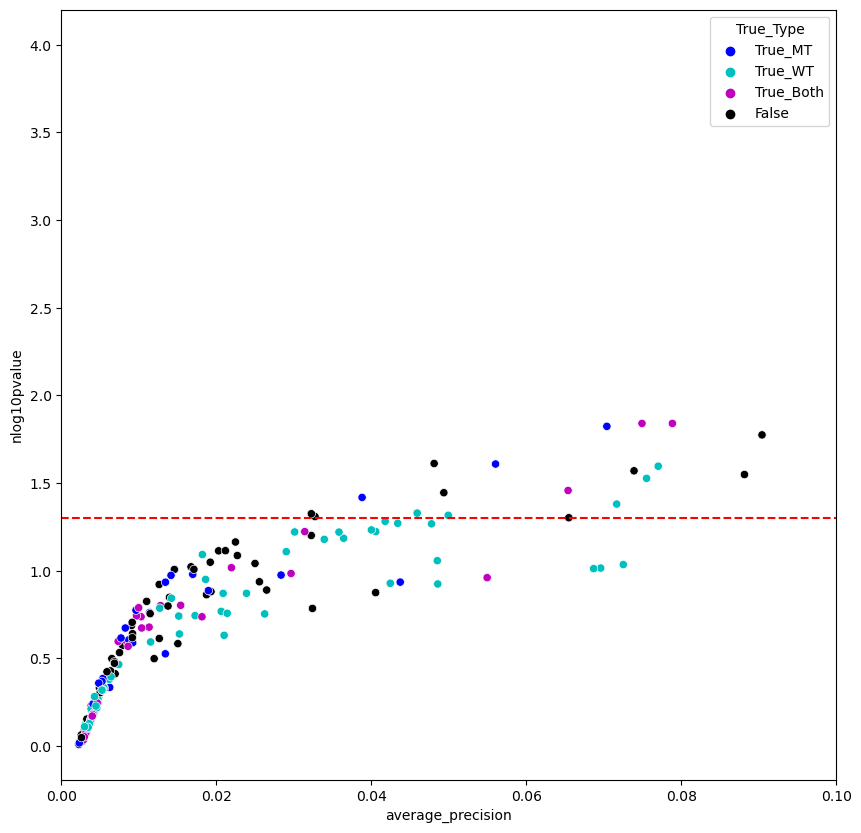

In [23]:
#use sns scatter plot to plot nlog10pvalue_bio and color the points based on above_p_threshold_condition
#sns.scatterplot(data=result_merge, x='average_precision',y='nlog10pvalue',hue='True_Type')
#set four defined colors to True_Type
colors = {'True_MT':'b', 'True_WT':'c', 'True_Both':'m', 'False':'black'}
#use colors as color palette
palette = colors.values()
#use colors as hue_order
hue_order = colors.keys()
#use sns scatter plot to plot nlog10pvalue_bio and color the points based on above_p_threshold_condition
sns.scatterplot(data=result_merge, x='average_precision',y='nlog10pvalue',hue='True_Type',palette=palette,hue_order=hue_order)
#set x axis limit at 0.1
plt.xlim(0,0.1)
plt.axhline(y=-np.log10(0.05), color='r', linestyle='--')
plt.show()